#**Image Colorization Through CNN**

In [ ]:
import matplotlib.pyplot as plt
import cv2

In [1]:
import numpy as np 
import pandas as pd 
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Reshape
import tensorflow as tf
import os

In [ ]:
images_gray = np.load('l/gray_scale.npy')
images_lab = np.load('ab/ab/ab1.npy')

In [ ]:
def pipe_line_img(gray_scale_imgs, batch_size = 100, preprocess_f = preprocess_input):
    imgs = np.zeros((batch_size, 224, 224, 3))
    for i in range(0, 3):
        imgs[:batch_size, :, :,i] = gray_scale_imgs[:batch_size]
    return preprocess_f(imgs)

imgs_for_input = pipe_line_img(images_gray, batch_size = 300)

In [ ]:
def get_rbg_from_lab(gray_imgs, ab_imgs, n = 10):
    
    #create an empty array to store images
    imgs = np.zeros((n, 224, 224, 3))
    
    imgs[:, :, :, 0] = gray_imgs[0:n:]
    imgs[:, :, :, 1:] = ab_imgs[0:n:]
    
    #convert all the images to type unit8
    imgs = imgs.astype("uint8")
    imgs_ = []
  
    for i in range(0, n):
        imgs_.append(cv2.cvtColor(imgs[i], cv2.COLOR_LAB2RGB))
    imgs_ = np.array(imgs_)
    return imgs_
    
imgs_for_output = preprocess_input(get_rbg_from_lab(gray_imgs = images_gray, ab_imgs = images_lab, n = 300))

In [ ]:
model_simple = Sequential()
model_simple.add(Conv2D(strides = 1, kernel_size = 3, filters = 12, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_simple.add(Conv2D(strides = 1, kernel_size = 3, filters = 12, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_simple.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 12, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_simple.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 3, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))

model_simple.compile(optimizer = tf.keras.optimizers.Adam(epsilon = 1e-8), loss = tf.losses.MeanSquaredError())

In [ ]:
imgs_for_s = np.zeros((300, 224, 224, 1))
imgs_for_s[:, :, :, 0] = images_gray[:300] 

In [ ]:
model_simple.fit(imgs_for_input, imgs_for_output, epochs = 10, batch_size = 16)

Epoch 1/10
19/19 [==============================] - 17s 877ms/step - loss: 0.3912
Epoch 2/10
19/19 [==============================] - 16s 836ms/step - loss: 0.3632
Epoch 3/10
19/19 [==============================] - 14s 711ms/step - loss: 0.3619
Epoch 4/10
19/19 [==============================] - 20s 1s/step - loss: 0.3612
Epoch 5/10
19/19 [==============================] - 17s 900ms/step - loss: 0.3604
Epoch 6/10
19/19 [==============================] - 12s 645ms/step - loss: 0.3594
Epoch 7/10
19/19 [==============================] - 13s 681ms/step - loss: 0.3369
Epoch 8/10
19/19 [==============================] - 13s 675ms/step - loss: 0.3329
Epoch 9/10
19/19 [==============================] - 13s 663ms/step - loss: 0.3320
Epoch 10/10
19/19 [==============================] - 12s 656ms/step - loss: 0.3315


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


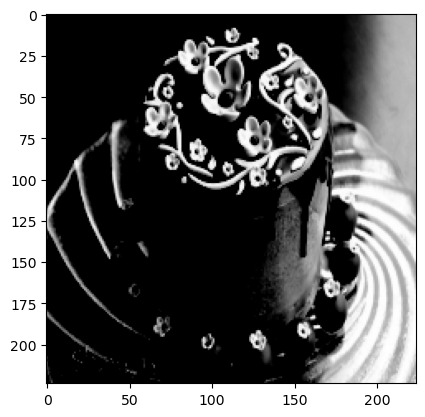

In [ ]:
plt.imshow(imgs_for_input[2])

In [ ]:
prediction = model_simple.predict(imgs_for_input)

10/10 [==============================] - 5s 461ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


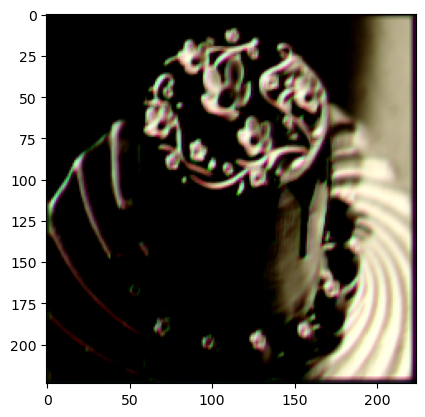

In [ ]:
plt.imshow(prediction[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


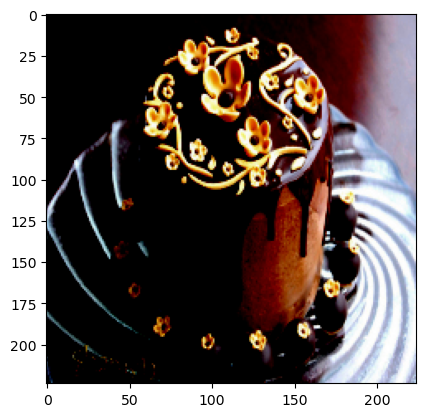

In [ ]:
plt.imshow(imgs_for_output[2])